## IMPORTS 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## DATA DICTIONARY


###### This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in 
###### the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). 
###### The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy 
###### and 1 for PD.

#### FEATURES OF DATA SET :

###### name - Name and Recognized number
###### MDVP :Fo(Hz) - Average vocal fundamental frequency
###### MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
###### MDVP:Flo(Hz) - Minimum vocal fundamental frequency
###### MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
###### MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
###### NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
###### status - The health status of the subject (one) - Parkinson's, (zero) - healthy
###### RPDE, D2 - Two nonlinear dynamical complexity measures
###### DFA - Signal fractal scaling exponent
###### spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

### IMPORTING THE DATA 

In [2]:
d=pd.read_csv("D:/INTERN ACADEMY TASKS/parkinsons.csv",header=0)

In [3]:
d.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
d.shape

(195, 24)

In [5]:
d.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [6]:
d.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
d.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
#Since name is object and will not be used to classify people,so drop the column

f=d['name']

d.drop('name',axis=1,inplace=True)

## Visulaizing Relations

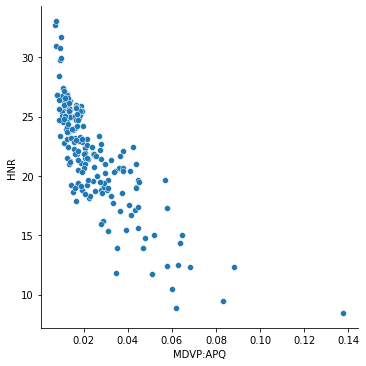

In [10]:


sns.relplot(x='MDVP:APQ',y='HNR',data=d)

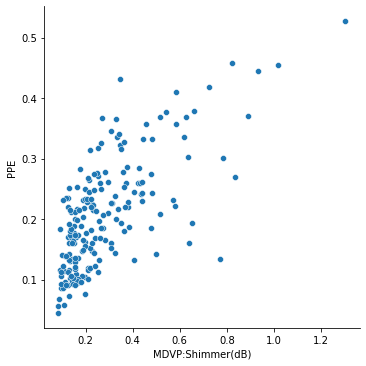

In [11]:
sns.relplot(x='MDVP:Shimmer(dB)',y='PPE',data=d)

In [12]:
#Seperating input features and output labels

x=d.drop('status',axis=1)

y=d['status']

In [13]:
print('Shape of input data : {}'.format(x.shape))

print('Shape of output label data : {}'.format(y.shape))

Shape of input data : (195, 22)
Shape of output label data : (195,)


## Frequency plot for categorical output labels

<AxesSubplot:xlabel='status', ylabel='count'>

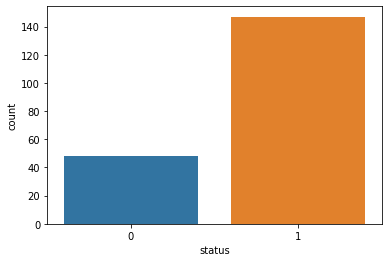

In [14]:


sns.countplot(x=y,data=d)

In [15]:
y.value_counts()

1    147
0     48
Name: status, dtype: int64

## SPLITING THE DATA TO TRAIN AND TEST MODEL

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((136, 22), (136,), (59, 22), (59,))

In [19]:
x_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
38,180.198,201.249,175.456,0.00284,0.00002,0.00153,0.00166,0.00459,0.01444,0.131,...,0.01190,0.02177,0.00231,26.738,0.403884,0.766209,-6.452058,0.212294,2.269398,0.141929
31,199.228,209.512,192.091,0.00241,0.00001,0.00134,0.00138,0.00402,0.01015,0.089,...,0.00762,0.01513,0.00167,30.940,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501
173,113.715,116.443,96.913,0.00349,0.00003,0.00171,0.00203,0.00514,0.01472,0.133,...,0.01148,0.02245,0.00478,26.547,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677
12,136.926,159.866,131.276,0.00293,0.00002,0.00118,0.00153,0.00355,0.01259,0.112,...,0.01140,0.01968,0.00581,25.703,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
109,193.030,208.900,80.297,0.00766,0.00004,0.00450,0.00389,0.01351,0.03044,0.275,...,0.02084,0.05312,0.00947,21.934,0.497554,0.740539,-5.845099,0.278679,2.608749,0.185668


## NORMALIZING THE INPUT DATA

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler().fit(x_train)

x_train=scaler.transform(x_train)

x_test=scaler.transform(x_test)

## DATA AFTER NORMALIZATION

In [21]:


df=pd.DataFrame(x_train[:5])


df.columns=x.columns

df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,0.559736,0.202040,0.633182,0.036849,0.051383,0.040944,0.039657,0.040938,0.044733,0.037798,...,0.036067,0.052189,0.005284,0.743599,0.343725,0.764631,0.273538,0.448363,0.376406,0.201707
1,0.675686,0.218913,0.728954,0.023189,0.011858,0.031792,0.024652,0.031787,0.005569,0.003287,...,0.003293,0.009565,0.003247,0.914370,0.410352,0.668402,0.051058,0.358102,0.302428,0.049628
2,0.154653,0.028869,0.180991,0.057497,0.090909,0.049615,0.059486,0.049767,0.047289,0.039441,...,0.032851,0.056554,0.013146,0.735837,0.288587,0.766587,0.365485,0.401712,0.190961,0.279888
3,0.296079,0.117537,0.378827,0.039708,0.051383,0.024085,0.032690,0.024241,0.027844,0.022186,...,0.032238,0.038773,0.016424,0.701536,0.476059,0.289093,0.256346,0.310613,0.274923,0.194630
4,0.637922,0.217663,0.085328,0.189962,0.130435,0.184008,0.159164,0.184139,0.190798,0.156122,...,0.104526,0.253434,0.028074,0.548362,0.562283,0.662363,0.383277,0.602102,0.527372,0.292297


In [22]:
x_train

array([[0.55973605, 0.20203992, 0.63318249, ..., 0.44836315, 0.376406  ,
        0.20170744],
       [0.67568638, 0.21891266, 0.72895437, ..., 0.35810229, 0.30242835,
        0.04962844],
       [0.15465325, 0.02886926, 0.18099071, ..., 0.40171235, 0.19096095,
        0.27988849],
       ...,
       [0.36521003, 0.12799837, 0.44228931, ..., 0.16014442, 0.40974337,
        0.29399703],
       [0.36442403, 0.10960641, 0.40050318, ..., 0.5145529 , 0.63252024,
        0.30692296],
       [0.31008031, 0.98884476, 0.00392069, ..., 0.58348695, 0.56392546,
        0.82893908]])

## IMPORTING THE MODEL FROM SKLEARN 

In [23]:
#importing logistic regression model:

from sklearn.linear_model import LogisticRegression

#Random forest model

from sklearn.ensemble import RandomForestClassifier


#Support vector machine

from sklearn.svm import SVC



In [24]:
lr=LogisticRegression()

rf=RandomForestClassifier(n_estimators=100,max_depth=3)

svc=SVC()


## TRAINING THE ALGORITHMS

In [25]:
lr.fit(x_train,y_train)

rf.fit(x_train,y_train)

svc.fit(x_train,y_train)



SVC()

In [26]:
y_pred_lr=lr.predict(x_test)

y_pred_rf=rf.predict(x_test)

y_pred_svc=svc.predict(x_test)

## EVALUATING PERFORMANCE OF MODELS

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

print('Confusion matrix : ')


print(confusion_matrix(y_test,y_pred_lr))

print('\n')

print('Accuracy score of Logistic Regression : {}'.format((accuracy_score(y_test,y_pred_lr))*100))

Confusion matrix : 
[[ 9  6]
 [ 1 43]]


Accuracy score of Logistic Regression : 88.13559322033898


In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

print('Confusion matrix : ')


print(confusion_matrix(y_test,y_pred_rf))

print('\n')

print('Accuracy score of Random Forest Classifier : {}'.format((accuracy_score(y_test,y_pred_rf))*100))

Confusion matrix : 
[[10  5]
 [ 1 43]]


Accuracy score of Random Forest Classifier : 89.83050847457628


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score

print('Confusion matrix : ')


print(confusion_matrix(y_test,y_pred_svc))

print('\n')

print('Accuracy score of Support Vector Classifier : {}'.format((accuracy_score(y_test,y_pred_svc))*100))

Confusion matrix : 
[[ 8  7]
 [ 0 44]]


Accuracy score of Support Vector Classifier : 88.13559322033898


## IMPROVING THE ACCURACY USING XGBOOST 

In [30]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

In [31]:
xgb=XGBClassifier()

In [32]:
xgb.fit(x_train,y_train)

C:\Users\Haseena\New folder\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:06:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
y_pred_xgb=xgb.predict(x_test)

In [34]:
print('Confusion Matrix :')

print(confusion_matrix(y_pred_xgb,y_test))

print('\n')

print('Accuracy of XGBOOST Classifier : {}'.format((accuracy_score(y_test,y_pred_xgb))*100))

Confusion Matrix :
[[10  0]
 [ 5 44]]


Accuracy of XGBOOST Classifier : 91.52542372881356


In [36]:
r=np.hstack((y_train.index.values,y_test.index.values))

In [37]:
p=pd.DataFrame(r)

In [38]:
v=np.hstack((y_pred_train,y_pred_xgb))

In [39]:
p['1']=v

In [40]:
p.head()

,0,1
0,38,1
1,31,0
2,173,0
3,12,1
4,109,1


In [41]:
p.columns=['Name_indices','Predictions']

In [42]:
p.head()

,Name_indices,Predictions
0,38,1
1,31,0
2,173,0
3,12,1
4,109,1


In [43]:
p.sort_values(by='Name_indices',inplace=True,ignore_index=True)

In [44]:
p.head()

,Name_indices,Predictions
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1


In [45]:
f.head()

0    phon_R01_S01_1
1    phon_R01_S01_2
2    phon_R01_S01_3
3    phon_R01_S01_4
4    phon_R01_S01_5
Name: name, dtype: object

In [46]:
R=pd.DataFrame(f.values)

In [47]:
R.columns=['Names']

In [48]:
R['Predictions']=p['Predictions'].values

In [49]:
R.head()

,Names,Predictions
0,phon_R01_S01_1,1
1,phon_R01_S01_2,1
2,phon_R01_S01_3,1
3,phon_R01_S01_4,1
4,phon_R01_S01_5,1


In [50]:
R.head(500)

,Names,Predictions
0,phon_R01_S01_1,1
1,phon_R01_S01_2,1
2,phon_R01_S01_3,1
3,phon_R01_S01_4,1
4,phon_R01_S01_5,1
...,...,...
190,phon_R01_S50_2,1
191,phon_R01_S50_3,0
192,phon_R01_S50_4,1
193,phon_R01_S50_5,0


In [51]:
x_train

array([[0.55973605, 0.20203992, 0.63318249, ..., 0.44836315, 0.376406  ,
        0.20170744],
       [0.67568638, 0.21891266, 0.72895437, ..., 0.35810229, 0.30242835,
        0.04962844],
       [0.15465325, 0.02886926, 0.18099071, ..., 0.40171235, 0.19096095,
        0.27988849],
       ...,
       [0.36521003, 0.12799837, 0.44228931, ..., 0.16014442, 0.40974337,
        0.29399703],
       [0.36442403, 0.10960641, 0.40050318, ..., 0.5145529 , 0.63252024,
        0.30692296],
       [0.31008031, 0.98884476, 0.00392069, ..., 0.58348695, 0.56392546,
        0.82893908]])

In [52]:
d['status'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)